In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

random.seed(10)

In [2]:
path = os.path.dirname(os.path.abspath(__name__)) + "/../data/x_train.txt"
x_train = pd.read_csv(path, sep=" ", header=None)
path = os.path.dirname(os.path.abspath(__name__)) + "/../data/y_train.txt"
y_train = pd.read_csv(path, sep=" ", header=None)
y = y_train.copy()
y.columns = ["y"]
train = pd.concat([x_train, y], axis=1)
train_important = train.iloc[:, [0, 2, 3, 4, 5, 6, 8, 9, 100, 101, 102, 103, 104, 105]]

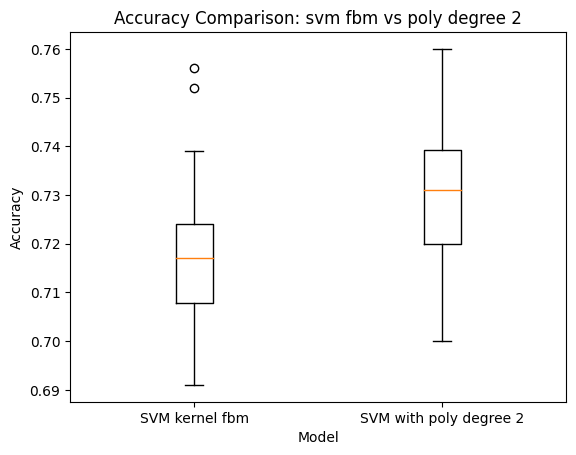

CPU times: user 1min 33s, sys: 402 ms, total: 1min 33s
Wall time: 1min 34s


In [7]:
%%time

random.seed(423)
random_states = [random.randint(0, 10000) for i in range(80)]
random_states

accuracies_svm = []
accuracies_svm_with_interactions = []

for random_state in random_states:
    X_train, X_test, y_train, y_test = train_test_split(
        train_important, train["y"], test_size=0.2, random_state=random_state
    )


    svm = SVC()
    svm.fit(X_train, y_train)
    accuracy = svm.score(X_test, y_test)
    accuracies_svm.append(accuracy)


    svm_with_interactions = SVC(kernel="poly", degree=2)
    svm_with_interactions.fit(X_train, y_train)
    accuracy = svm_with_interactions.score(X_test, y_test)
    accuracies_svm_with_interactions.append(accuracy)




plt.boxplot([accuracies_svm, accuracies_svm_with_interactions])
plt.xticks([1, 2], ['SVM kernel fbm', 'SVM with poly degree 2'])
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison: svm fbm vs poly degree 2')
plt.show()